In [1]:
import sys
if not '../..' in sys.path:
    sys.path.append('../..')
    sys.path.append('..')
from analysis import collection, analysis, emg, plot, model
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import patches, lines
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from joblib import dump, load
from analysis.offsets import offsets

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'axes.labelsize': 16})
mpl.rcParams.update({'figure.figsize': (16*0.8,9*0.8)})
mpl.rcParams.update({'axes.facecolor': "white"})
mpl.rcParams.update({'lines.marker': "+"})
mpl.rcParams.update({'lines.linestyle': ""})
mpl.rcParams.update({"axes.spines.left":   True})
mpl.rcParams.update({"axes.spines.bottom": True})
mpl.rcParams.update({"axes.spines.top":    False})
mpl.rcParams.update({"axes.spines.right":  False})

image_path = Path("/Users/spencer/phd/phd/images/more_results/nullspace/")

%matplotlib inline

In [2]:
# def find_rise_point(sig):
#     # where does the activity first go above a threshold?
#     # assuming we've removed the hold steps
#     # params
#     num_to_avg = 10
#     percentile = 0.15
#     threshold = np.max(np.quantile(np.abs(sig),percentile,axis=0))

#     # average the few steps of data
#     offset = np.mean(sig[:num_to_avg,:],axis=0)

#     # find the first point where values go above/below this average by a threshold amount
#     # only use the "x" axis point
#     return np.min(np.argmax(np.abs(sig - offset) > threshold, axis=0))

In [3]:
subjects = analysis.load_subjects()

In [4]:
import pandas as pd
trajectory_df = pd.read_pickle("../trajectory_dataframe.pkl")
mean_rewards = 1 / trajectory_df.groupby(level=['subject']).mean()["reward"]

## visualize activation filtering

#### find trials with most and least active points for a subject as an example

In [5]:
# subject_idx = 13

# medium_active_trial = (0,0,np.inf)
# for session_idx, session in enumerate(subjects[subject_idx].tasks[task_name].sorted_sessions()):
#     for trial_idx, trial in enumerate(session.sorted_trials()):
#         if trial.outcome != "No Hold":
#             num_active_samples = len(trial.active_indices)
#             if np.abs(num_active_samples - 100) < medium_active_trial[2]:
#                 medium_active_trial = (session_idx, trial_idx, num_active_samples)

# most_active_trial = (0,0,0)
# for session_idx, session in enumerate(subjects[subject_idx].tasks[task_name].sorted_sessions()):
#     for trial_idx, trial in enumerate(session.sorted_trials()):
#         if trial.outcome != "No Hold":
#             num_active_samples = len(trial.active_indices)
#             if num_active_samples > most_active_trial[2]:
#                 most_active_trial = (session_idx, trial_idx, num_active_samples)

# fewest_active_trial = (np.inf,np.inf,np.inf)
# for session_idx, session in enumerate(subjects[subject_idx].tasks[task_name].sorted_sessions()):
#     for trial_idx, trial in enumerate(session.sorted_trials()):
#         if trial.outcome != "No Hold":
#             num_active_samples = len(trial.active_indices)
#             if num_active_samples < fewest_active_trial[2]:
#                 fewest_active_trial = (session_idx, trial_idx, num_active_samples)

# fig = plt.figure(figsize=(50,30))

# gs1 = GridSpec(6, 6, left=0.05, right=0.48, wspace=0.05)
# ax1 = fig.add_subplot(gs1[0:2, :2])
# ax2 = fig.add_subplot(gs1[2, :2])
# ax3 = fig.add_subplot(gs1[3, :2])
# ax4 = fig.add_subplot(gs1[4, :2])
# ax5 = fig.add_subplot(gs1[5, :2])

# gs2 = GridSpec(6, 6, left=0.05, right=0.48, wspace=0.05)
# ax6 = fig.add_subplot(gs2[0:2, 2:4])
# ax7 = fig.add_subplot(gs2[2, 2:4])
# ax8 = fig.add_subplot(gs2[3, 2:4])
# ax9 = fig.add_subplot(gs2[4, 2:4])
# ax10 = fig.add_subplot(gs2[5, 2:4])

# gs3 = GridSpec(6, 6, left=0.05, right=0.48, wspace=0.05)
# ax11 = fig.add_subplot(gs2[0:2, 4:])
# ax12 = fig.add_subplot(gs2[2, 4:])
# ax13 = fig.add_subplot(gs2[3, 4:])
# ax14 = fig.add_subplot(gs2[4, 4:])
# ax15 = fig.add_subplot(gs2[5, 4:])


# # getting lengths of trajectory and emg to match
# # min_length = np.min([traj.shape[0],emg.shape[0]])
# # traj = traj[:min_length,:]
# # emg = emg[:min_length,:]


# session_idx = fewest_active_trial[0]
# trial_idx = fewest_active_trial[1]
# trial = subjects[subject_idx].tasks[task_name].sorted_sessions()[session_idx].sorted_trials()[trial_idx]
# active_emg_samples = trial.filtered_emg[trial.active_indices,:]
# active_traj_samples = trial.trajectory[trial.active_indices,:]
# hold_indices = range(int(200*trial.hold_time))

# ax1.plot(trial.trajectory[:,0], trial.trajectory[:,1],"k")
# ax1.plot(active_traj_samples[:,0], active_traj_samples[:,1], "r")
# ax1.plot(trial.trajectory[trial.trajectory_low_point,0], trial.trajectory[trial.trajectory_low_point,1], "r*")
# ax1.plot(trial.trajectory[hold_indices,0],trial.trajectory[hold_indices,1])

# ax2.plot(trial.trajectory[:,0],"k")
# ax2.plot(trial.active_indices, active_traj_samples[:,0], "r")
# ax2.plot(trial.trajectory[hold_indices,0], "tab:blue")
# ax2.plot(trial.trajectory_low_point, trial.trajectory[trial.trajectory_low_point,0], "r*")

# ax3.plot(trial.trajectory[:,1],"k")
# ax3.plot(trial.active_indices, active_traj_samples[:,1], "r")
# ax3.plot(trial.trajectory[hold_indices,1], "tab:blue")
# ax3.plot(trial.trajectory_low_point, trial.trajectory[trial.trajectory_low_point,1], "r*")

# ax4.plot(trial.filtered_emg[:,4],"k")
# ax4.plot(trial.filtered_emg[hold_indices,4],"tab:blue")
# ax4.plot(trial.active_indices, active_emg_samples[:,4], "r")
# ax4.plot(trial.trajectory_low_point, trial.filtered_emg[trial.trajectory_low_point,4], "r*")

# ax5.plot(trial.filtered_emg[:,54],"k")
# ax5.plot(trial.filtered_emg[hold_indices,54],"tab:blue")
# ax5.plot(trial.active_indices, active_emg_samples[:,54], "r")
# ax5.plot(trial.trajectory_low_point, trial.filtered_emg[trial.trajectory_low_point,54], "r*")



# session_idx = most_active_trial[0]
# trial_idx = most_active_trial[1]
# trial = subjects[subject_idx].tasks[task_name].sorted_sessions()[session_idx].sorted_trials()[trial_idx]
# active_emg_samples = trial.filtered_emg[trial.active_indices,:]
# active_traj_samples = trial.trajectory[trial.active_indices,:]
# hold_indices = range(int(200*trial.hold_time))

# ax6.plot(trial.trajectory[:,0], trial.trajectory[:,1],"k")
# ax6.plot(active_traj_samples[:,0], active_traj_samples[:,1], "r")
# ax6.plot(trial.trajectory[trial.trajectory_low_point,0], trial.trajectory[trial.trajectory_low_point,1], "r*")
# ax6.plot(trial.trajectory[hold_indices,0],trial.trajectory[hold_indices,1])

# ax7.plot(trial.trajectory[:,0],"k")
# ax7.plot(trial.active_indices, active_traj_samples[:,0], "r")
# ax7.plot(trial.trajectory[hold_indices,0], "tab:blue")
# ax7.plot(trial.trajectory_low_point, trial.trajectory[trial.trajectory_low_point,0], "r*")

# ax8.plot(trial.trajectory[:,1],"k")
# ax8.plot(trial.active_indices, active_traj_samples[:,1], "r")
# ax8.plot(trial.trajectory[hold_indices,1], "tab:blue")
# ax8.plot(trial.trajectory_low_point, trial.trajectory[trial.trajectory_low_point,1], "r*")

# ax9.plot(trial.filtered_emg[:,4],"k")
# ax9.plot(trial.filtered_emg[hold_indices,4],"tab:blue")
# ax9.plot(trial.active_indices, active_emg_samples[:,4], "r")
# ax9.plot(trial.trajectory_low_point, trial.filtered_emg[trial.trajectory_low_point,4], "r*")

# ax10.plot(trial.filtered_emg[:,54],"k")
# ax10.plot(trial.filtered_emg[hold_indices,54],"tab:blue")
# ax10.plot(trial.active_indices, active_emg_samples[:,54], "r")
# ax10.plot(trial.trajectory_low_point, trial.filtered_emg[trial.trajectory_low_point,54], "r*")



# session_idx = medium_active_trial[0]
# trial_idx = medium_active_trial[1]
# trial = subjects[subject_idx].tasks[task_name].sorted_sessions()[session_idx].sorted_trials()[trial_idx]
# active_emg_samples = trial.filtered_emg[trial.active_indices,:]
# active_traj_samples = trial.trajectory[trial.active_indices,:]
# hold_indices = range(int(200*trial.hold_time))

# ax11.plot(trial.trajectory[:,0], trial.trajectory[:,1],"k")
# ax11.plot(active_traj_samples[:,0], active_traj_samples[:,1], "r")
# ax11.plot(trial.trajectory[trial.trajectory_low_point,0], trial.trajectory[trial.trajectory_low_point,1], "r*")
# ax11.plot(trial.trajectory[hold_indices,0],trial.trajectory[hold_indices,1])

# ax12.plot(trial.trajectory[:,0],"k")
# ax12.plot(trial.active_indices, active_traj_samples[:,0], "r")
# ax12.plot(trial.trajectory[hold_indices,0], "tab:blue")
# ax12.plot(trial.trajectory_low_point, trial.trajectory[trial.trajectory_low_point,0], "r*")

# ax13.plot(trial.trajectory[:,1],"k")
# ax13.plot(trial.active_indices, active_traj_samples[:,1], "r")
# ax13.plot(trial.trajectory[hold_indices,1], "tab:blue")
# ax13.plot(trial.trajectory_low_point, trial.trajectory[trial.trajectory_low_point,1], "r*")

# ax14.plot(trial.filtered_emg[:,4],"k")
# ax14.plot(trial.filtered_emg[hold_indices,4],"tab:blue")
# ax14.plot(trial.active_indices, active_emg_samples[:,4], "r")
# ax14.plot(trial.trajectory_low_point, trial.filtered_emg[trial.trajectory_low_point,4], "r*")

# ax15.plot(trial.filtered_emg[:,54],"k")
# ax15.plot(trial.filtered_emg[hold_indices,54],"tab:blue")
# ax15.plot(trial.active_indices, active_emg_samples[:,54], "r")
# ax15.plot(trial.trajectory_low_point, trial.filtered_emg[trial.trajectory_low_point,54], "r*")




## number of hits over subjects

In [6]:
hit_fractions = {}
hit_fraction_list = []
for subject in subjects:
    trial_list = []
    for session in subject.tasks["center_hold"].sorted_sessions():
        trial_list.extend(list(session.sorted_trials())) 
    num_trials = len(trial_list)
    hf = (sum([outcome["hits"] for outcome in [session.outcome_counts for session in subject.tasks["center_hold"].sorted_sessions()]]) / num_trials)
    hit_fractions[subject.name] = hf
    hit_fraction_list.append(hf)

## get hit ends for subject

In [7]:
def closest_idx_to_target(target_no, traj):
    assert 0 < target_no < 13, target_no
    assert traj.shape[0] == 2, traj.shape
    assert len(traj.shape) == 2, traj.shape
    target_vec = collection.compute_target_vec_from_number(target_no)
    dist = np.linalg.norm(traj - target_vec.reshape(2,-1),axis=0)
    min_dist_i = np.argmin(dist)
    return min_dist_i

In [8]:
NUM_ENDPOINTS = 5
# get emg ending activity means over hit trials for each target
hit_ends = np.ones(shape=(len(subjects),45,12,64))
hit_ends[:] = np.nan
for subject_idx, subject in enumerate(subjects):
    for target_no in range(1,13):
        for session_idx, session in enumerate(list(subject.tasks["center_hold"].sorted_sessions())):
            for trial in session.sorted_trials():
                if trial.target_number == target_no:
                    if trial.outcome == "Hit":
                        hit_ends[subject_idx,session_idx,target_no-1,:] = np.mean(trial.get_filtered_emg()[-NUM_ENDPOINTS:,:], axis=0)

## get moment of highest reward for misses ("miss ends")

In [9]:
subject_idx = 0
session_idx = 13
# target_no = 4

# subject, session, target, channel
miss_ends = np.ones(shape=(len(subjects),45,12,64))
miss_ends[:] = np.nan
# plt.figure()
# plt.xlim([-2.5,2.5])
# plt.ylim([-2.5,2.5])
# plt.gca().set_aspect("equal")
decoder = subjects[subject_idx].decoder[-2:,:]
for subject_idx, subject in enumerate(subjects):
    for session_idx, session in enumerate(subjects[subject_idx].tasks["center_hold"].sorted_sessions()):
        for trial in session.sorted_trials():
            if trial.outcome == "Miss":
                emg = trial.get_filtered_emg().T
                traj = decoder @ emg 
                target_no = trial.target_number
                target_idx = target_no - 1
                target_vec = collection.compute_target_vec_from_number(target_no)
                min_dist_i = closest_idx_to_target(target_no,traj)
                miss_end = emg[:,min_dist_i]
                miss_ends[subject_idx,session_idx,target_idx,:] = miss_end

## viz ends for one subject, ratios over targets, ratios over subjects

In [24]:
subject_hit_ratios = []
subject_miss_ratios = []

subject_hit_task = []
subject_hit_null = []

subject_miss_task = []
subject_miss_null = []
for subject_idx, subject in enumerate(subjects):
    decoder = subject.decoder[-2:,:]
    task, null = analysis.compute_subspaces(decoder)

    hit_ratios = []
    miss_ratios = []

    hit_task = []
    hit_null = []

    miss_task = []
    miss_null = []
    for target_idx in range(12):
        # hits
        hits = analysis.remove_nan_rows(hit_ends[subject_idx,:,target_idx].reshape(-1,64)).T
        hit_C = np.cov(hits)

        hit_task_proj = analysis.mean_quadratic_form(hit_C, task)[0]
        hit_task.append(hit_task_proj)

        hit_null_proj = analysis.mean_quadratic_form(hit_C, null)[0]
        hit_null.append(hit_null_proj)

        hit_ratios.append(hit_task_proj / hit_null_proj)

        # miss
        misses = analysis.remove_nan_rows(miss_ends[subject_idx,:,target_idx].reshape(-1,64)).T
        miss_C = np.cov(misses)

        miss_task_proj = analysis.mean_quadratic_form(miss_C, task)[0]
        miss_task.append(miss_task_proj)

        miss_null_proj = analysis.mean_quadratic_form(miss_C, null)[0]
        miss_null.append(miss_null_proj)

        miss_ratios.append(miss_task_proj / miss_null_proj)

    subject_hit_ratios.append(hit_ratios)
    subject_miss_ratios.append(miss_ratios)

    subject_hit_task.append(hit_task)
    subject_hit_null.append(hit_null)

    subject_miss_task.append(miss_task)
    subject_miss_null.append(miss_null)

subject_hit_ratios = np.array(subject_hit_ratios)
subject_miss_ratios = np.array(subject_miss_ratios)

subject_hit_task = np.array(subject_hit_task)
subject_hit_null = np.array(subject_hit_null)

subject_miss_task = np.array(subject_miss_task)
subject_miss_null = np.array(subject_miss_null)

print(subject_hit_ratios.shape)
print(subject_miss_ratios.shape)
print(subject_hit_task.shape)
print(subject_hit_null.shape)
print(subject_miss_task.shape)
print(subject_miss_null.shape)

(46, 12)
(46, 12)
(46, 12)
(46, 12)
(46, 12)
(46, 12)


/var/folders/dz/870p8tdx43j5527kzthy65zw0000gn/T/ipykernel_15242/3414032171.py:36: RuntimeWarning: Degrees of freedom <= 0 for slice
  miss_C = np.cov(misses)
/opt/homebrew/Caskroom/miniconda/base/envs/data_fix/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/homebrew/Caskroom/miniconda/base/envs/data_fix/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/homebrew/Caskroom/miniconda/base/envs/data_fix/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/homebrew/Caskroom/miniconda/base/envs/data_fix/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/var/folders/dz/870p8tdx43j5527kzthy65zw0000gn/T/ipykernel_15242/34140321

### median of the subject

In [25]:
subject_hit_ratios.ravel()[~np.isnan(subject_hit_ratios.ravel())],subject_miss_ratios.ravel()[~np.isnan(subject_miss_ratios.ravel())]

(array([0.18425047, 0.27315902, 0.36138915, 0.14589264, 0.05744872,
        0.07771071, 0.10748712, 0.12683186, 0.08869524, 0.1579557 ,
        0.13699057, 0.10760765, 0.73576406, 0.69567416, 0.34223871,
        0.23746513, 0.46405307, 0.15727833, 0.04623049, 0.18207691,
        0.0954915 , 0.2018042 , 0.22157734, 0.19969124, 0.16530136,
        0.15510939, 0.11282815, 0.09257003, 0.14023497, 0.14207089,
        0.07645991, 0.09127997, 0.22414239, 0.51633074, 0.41865976,
        0.18593326, 0.43567329, 0.27182093, 0.21224929, 0.33572961,
        0.55913337, 0.30927313, 0.36965899, 1.54794871, 2.59110171,
        0.5459137 , 0.23132709, 0.13379691, 0.13651003, 0.12036245,
        0.07234881, 0.07084485, 0.03373472, 0.05763472, 0.07673038,
        0.06605317, 0.0624462 , 0.04454733, 0.1486387 , 0.28961711,
        0.41745176, 0.40792519, 1.15966502, 0.63133239, 1.92379935,
        4.2425387 , 0.25546231, 0.11926515, 0.1022218 , 0.07747926,
        0.12412014, 0.53325082, 0.31886558, 0.40

In [26]:
subject_hit_ratios.shape

(46, 12)

## covariance over targets

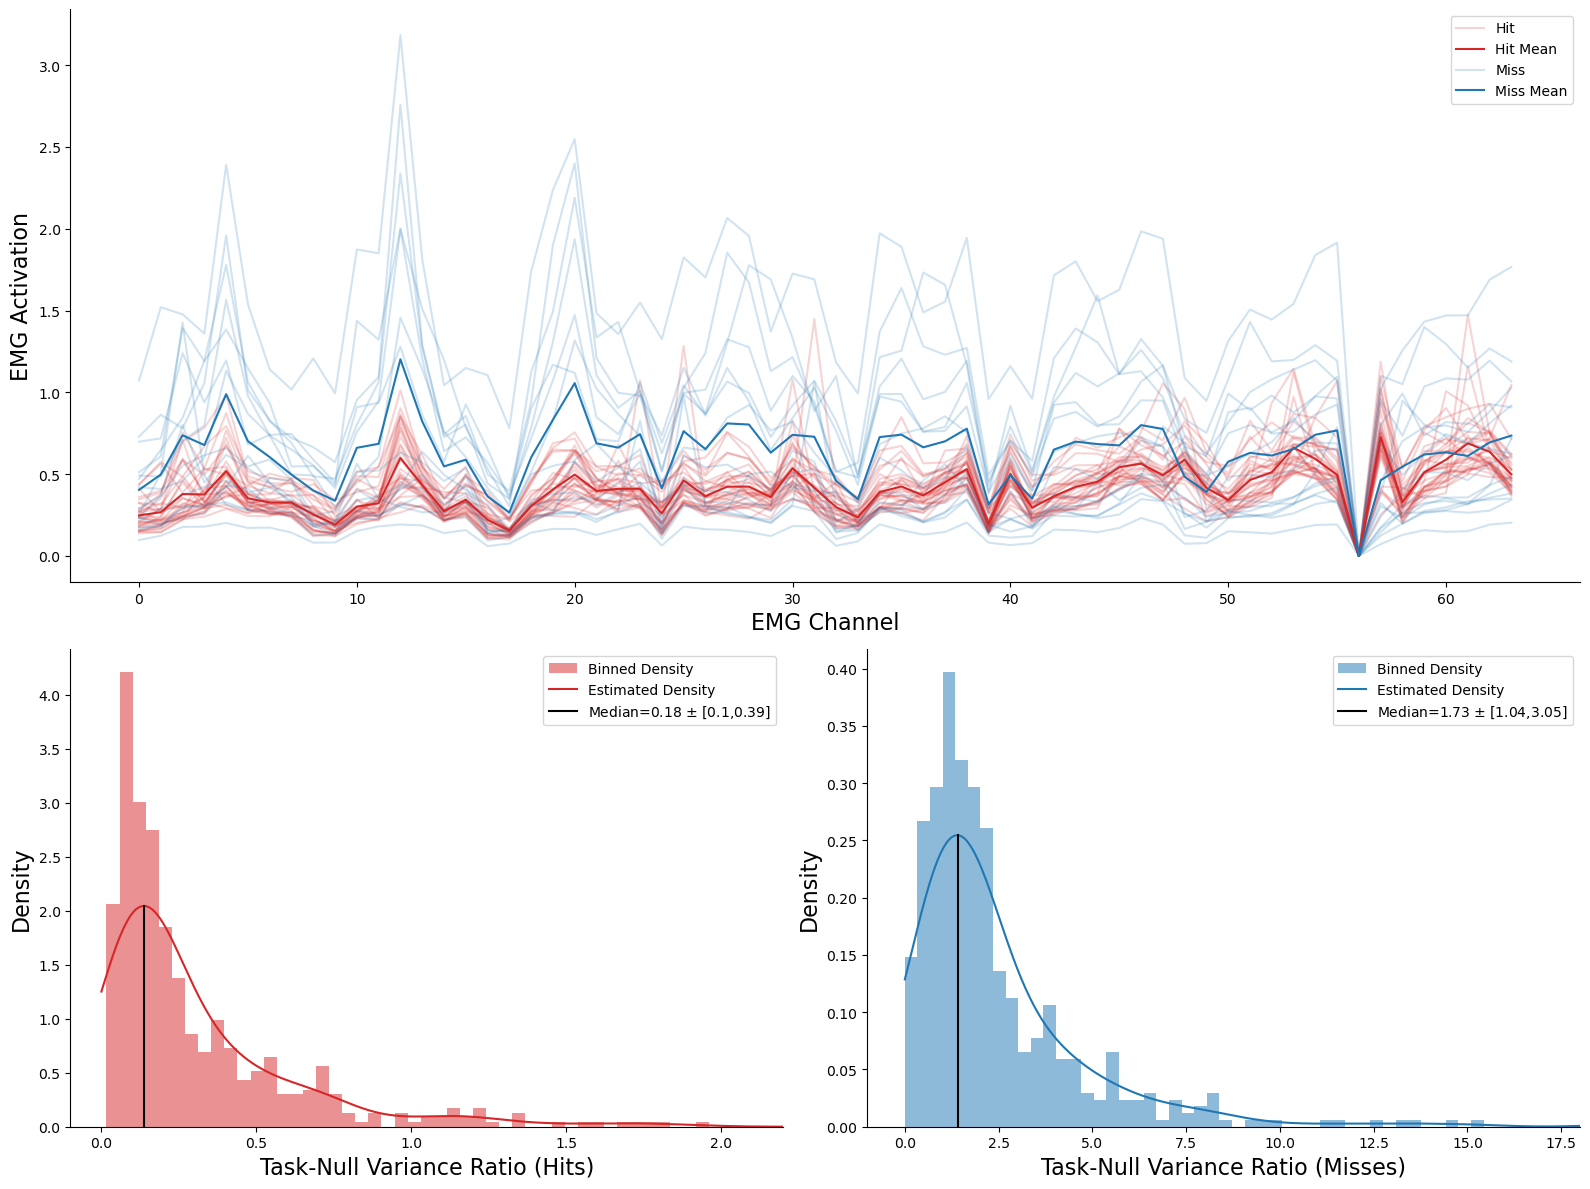

In [31]:
# fig, axes = plt.subplots(2,1,figsize=(15,20))
# fig.tight_layout(h_pad=5)

import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True,figsize=(16,12))
gs = gridspec.GridSpec(2, 2, height_ratios=(1.2,1))
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# single subject ends
subject_idx = 10
target_idx = 4
hits = hit_ends[subject_idx,:,target_idx]
misses = miss_ends[subject_idx,:,target_idx]

h = ax1.plot(hits.T,color="tab:red",linestyle="-",marker="",alpha=0.2,label="Hits")
n_hits = hits.shape[1]
# yerr=np.nanstd(hits.T,axis=1)
he = ax1.errorbar(x=np.arange(64),y=np.nanmean(hits.T,axis=1),color="tab:red",marker="",linestyle="-",label="Mean Hits",capsize=5)
# he = ax1.errorbar(x=np.arange(64),y=np.nanmedian(hits.T,axis=1),yerr=np.nanstd(hits.T,axis=1)/n_hits,color="tab:red",marker="",linestyle="-",label="Mean Hits",capsize=5)

m = ax1.plot(misses.T,color="tab:blue",linestyle="-",marker="",alpha=0.2,label="Misses")
n_misses = misses.shape[1]
# yerr=np.nanstd(misses.T,axis=1)
me = ax1.errorbar(x=np.arange(64),y=np.nanmean(misses.T,axis=1),color="tab:blue",marker="",linestyle="-",label="Mean Misses",capsize=5)
# me = ax1.errorbar(x=np.arange(64),y=np.nanmedian(misses.T,axis=1),yerr=np.nanstd(misses.T,axis=1)/n_misses,color="tab:blue",marker="",linestyle="-",label="Mean Misses",capsize=5)

ax1.legend(handles=[h[0],he,m[0],me],labels=["Hit","Hit Mean","Miss","Miss Mean"])
ax1.set_xlabel("EMG Channel")
ax1.set_ylabel("EMG Activation")

from scipy import stats

hit_ratios = subject_hit_ratios.ravel()[~np.isnan(subject_hit_ratios.ravel())]
_ = ax2.hist(hit_ratios,bins=100,alpha=0.5,density=True,color="tab:red",label="Binned Density")
kde = stats.gaussian_kde(hit_ratios)
x = np.linspace(0,2.2,500)
ax2.plot(x,kde(x),color="tab:red",linestyle="-",marker="",label="Estimated Density")
m = np.max(kde(x))
mx = x[np.argmax(kde(x))]
p25 = np.round(np.percentile(hit_ratios,25),2)
p75 = np.round(np.percentile(hit_ratios,75),2)
ax2.plot([mx,mx],[0,m],"-",color="k",label=f"Median={np.round(np.median(hit_ratios),2)} $\pm$ [{p25},{p75}]")
ax2.set_xlim([-0.1,2.2])
ax2.set_ylabel("Density")
ax2.set_xlabel("Task-Null Variance Ratio (Hits)")
ax2.legend()

miss_ratios = subject_miss_ratios.ravel()[~np.isnan(subject_miss_ratios.ravel())]
_ = ax3.hist(miss_ratios,bins=100,alpha=0.5,density=True,color="tab:blue",label="Binned Density")
kde = stats.gaussian_kde(miss_ratios)
x = np.linspace(0,18,500)
ax3.plot(x,kde(x),color="tab:blue",linestyle="-",marker="",label="Estimated Density")
m = np.max(kde(x))
mx = x[np.argmax(kde(x))]
p25 = np.round(np.percentile(miss_ratios,25),2)
p75 = np.round(np.percentile(miss_ratios,75),2)
ax3.plot([mx,mx],[0,m],"-",color="k",label=f"Median={np.round(np.median(miss_ratios),2)} $\pm$ [{p25},{p75}]")
ax3.set_xlim([-1,18])
ax3.set_ylabel("Density")
ax3.set_xlabel("Task-Null Variance Ratio (Misses)")
ax3.legend()



# # ratios over targets
# hh = axes[1].plot(subject_hit_ratios.T,"tab:red",marker="o",alpha=0.4)
# he = axes[1].errorbar(x=range(subject_hit_ratios.T.shape[0]),
#                       y=np.nanmedian(subject_hit_ratios.T,axis=1),
#                       yerr=np.nanstd(subject_hit_ratios.T,axis=1)/46,
#                       color="k",
#                       linestyle="",
#                       marker="o",
#                       capsize=5)

# axes[1].set_ylabel("Task-Null Variance Ratio (Hits)")

# axes[1] = plt.twinx(axes[1])
# hm = axes[1].plot([i+0.5 for i in range(subject_miss_ratios.T.shape[0])], subject_miss_ratios.T,"tab:blue",marker="o",alpha=0.4)
# me = axes[1].errorbar(x=[i+0.5 for i in range(subject_miss_ratios.T.shape[0])],
#                       y=np.nanmedian(subject_miss_ratios.T,axis=1),
#                       yerr=np.nanstd(subject_miss_ratios.T,axis=1)/46,
#                       color="k",
#                       linestyle="",
#                       marker="o",
#                       capsize=5)
# axes[1].set_ylabel("Task-Null Variance Ratio (Misses)")
# axes[1].set_xticks([i+0.25 for i in range(12)],[f"Target {i+1}" for i in range(12)],rotation=60)
# axes[1].legend(handles=[hh[0],hm[0],he],labels=["Hits","Misses","Median $\pm$ StdErr"])
# axes[1].spines["right"].set_visible(True)


# ratios over subjects vs reward

# n_hits = [analysis.remove_nan_rows(hit_ends[subject_idx].reshape(-1,64)).shape[0] for subject_idx in range(len(subjects))]
# n_misses = [analysis.remove_nan_rows(miss_ends[subject_idx].reshape(-1,64)).shape[0] for subject_idx in range(len(subjects))]

# mean_hit = np.nanmedian(subject_hit_ratios,axis=1)
# norm_mean_hit = np.array([(mh/nh)/np.max(mean_hit) for mh,nh in zip(mean_hit,n_hits)])
# max = np.max(norm_mean_hit)
# x = analysis.linspace(mean_rewards)
# axes[2].plot(mean_rewards,np.log(norm_mean_hit/max),"tab:red",label="Hits",marker="o",alpha=0.5)
# res = analysis.linear_fit(mean_rewards,np.log(norm_mean_hit/max))
# plot.plot_linear_fit(x,res,axes[2],color="tab:red")

# mean_miss = np.nanmedian(subject_miss_ratios,axis=1)
# norm_mean_miss = np.array([mm/nm for mm,nm in zip(mean_miss,n_misses)])
# max = np.max(norm_mean_miss)
# axes[2].plot(mean_rewards,np.log(norm_mean_miss/max),"tab:blue",label="Misses",marker="o",alpha=0.5)
# res = analysis.linear_fit(mean_rewards,np.log(norm_mean_miss/max))
# plot.plot_linear_fit(x,res,axes[2],color="tab:blue")
# axes[2].legend(loc=4)
# axes[2].set_xlabel("Mean Reward")
# axes[2].set_ylabel("Log of Normalized Task-Null Ratio")

In [32]:
plot.save_figure(fig, "hit_miss_task_null_ratio",image_path)

Figure saved to /Users/spencer/phd/phd/images/more_results/nullspace/hit_miss_task_null_ratio.pdf


## covariance over chunks, not targets

In [13]:
# subject_hit_ratios = []
# subject_miss_ratios = []

# subject_hit_task = []
# subject_hit_null = []

# subject_miss_task = []
# subject_miss_null = []
# for subject_idx, subject in enumerate(subjects):
#     decoder = subject.decoder[-2:,:]
#     task, null = analysis.compute_subspaces(decoder)

#     hit_ratios = []
#     miss_ratios = []

#     hit_task = []
#     hit_null = []

#     miss_task = []
#     miss_null = []
#     for idx1, idx2 in analysis.make_chunk_indices():
#         # hits
#         hits = analysis.remove_nan_rows(hit_ends[subject_idx,idx1:idx2].reshape(-1,64)).T
#         hit_C = np.cov(hits)

#         hit_task_proj = analysis.mean_quadratic_form(hit_C, task)[0]
#         hit_task.append(hit_task_proj)

#         hit_null_proj = analysis.mean_quadratic_form(hit_C, null)[0]
#         hit_null.append(hit_null_proj)

#         hit_ratios.append(hit_task_proj / hit_null_proj)

#         # miss
#         misses = analysis.remove_nan_rows(miss_ends[subject_idx,idx1:idx2].reshape(-1,64)).T
#         miss_C = np.cov(misses)

#         miss_task_proj = analysis.mean_quadratic_form(miss_C, task)[0]
#         miss_task.append(miss_task_proj)

#         miss_null_proj = analysis.mean_quadratic_form(miss_C, null)[0]
#         miss_null.append(miss_null_proj)

#         miss_ratios.append(miss_task_proj / miss_null_proj)

#     subject_hit_ratios.append(hit_ratios)
#     subject_miss_ratios.append(miss_ratios)

#     subject_hit_task.append(hit_task)
#     subject_hit_null.append(hit_null)

#     subject_miss_task.append(miss_task)
#     subject_miss_null.append(miss_null)

# subject_hit_ratios = np.array(subject_hit_ratios)
# subject_miss_ratios = np.array(subject_miss_ratios)

# subject_hit_task = np.array(subject_hit_task)
# subject_hit_null = np.array(subject_hit_null)

# subject_miss_task = np.array(subject_miss_task)
# subject_miss_null = np.array(subject_miss_null)

# print(subject_hit_ratios.shape)
# print(subject_miss_ratios.shape)
# print(subject_hit_task.shape)
# print(subject_hit_null.shape)
# print(subject_miss_task.shape)
# print(subject_miss_null.shape)

(46, 5)
(46, 5)
(46, 5)
(46, 5)
(46, 5)
(46, 5)


/var/folders/dz/870p8tdx43j5527kzthy65zw0000gn/T/ipykernel_15242/3669915891.py:36: RuntimeWarning: Degrees of freedom <= 0 for slice
  miss_C = np.cov(misses)
/opt/homebrew/Caskroom/miniconda/base/envs/data_fix/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/homebrew/Caskroom/miniconda/base/envs/data_fix/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/homebrew/Caskroom/miniconda/base/envs/data_fix/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/homebrew/Caskroom/miniconda/base/envs/data_fix/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


ValueError: x and y must have same first dimension, but have shapes (5,) and (12,)

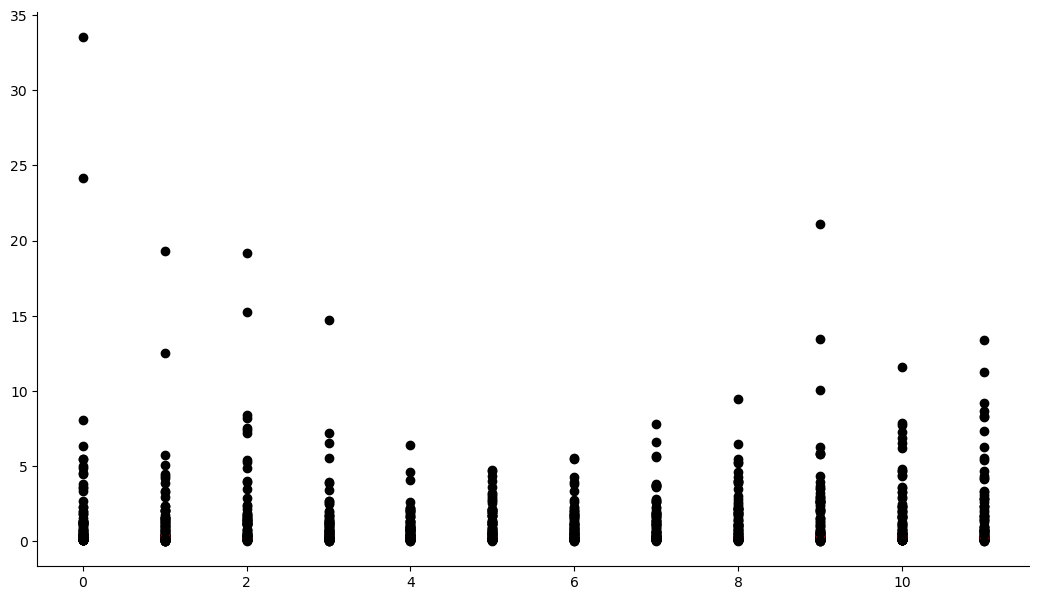

In [33]:
plt.plot(subject_hit_ratios.T,"ko")
plt.plot(subject_hit_ratios.T.mean(axis=1),"ro")

plt.plot(subject_miss_ratios.T,"ko")
plt.plot([i+0.5 for i in range(5)], np.nanmean(subject_miss_ratios.T,axis=1),"ro")

# old

## subspace projections of hit "ends" over subjects, over targets

In [7]:
# mean ratio for each target hit end's covariance
hit_end_ratios = {}
hit_end_task_vars = {}
hit_end_null_vars = {}
for subject_name, target_list in hit_ends.items():
    hit_end_task_vars[subject_name] = []
    hit_end_null_vars[subject_name] = []
    hit_end_ratios[subject_name] = []
    for emg_ends in target_list:
        if not emg_ends is None:
            cov = np.cov(emg_ends.T)
            task = collection.mean_quadratic_form(cov, subjects[subject_name].task_subspace)
            null = collection.mean_quadratic_form(cov, subjects[subject_name].null_subspace)
            hit_end_task_vars[subject_name].append(task[0])
            hit_end_null_vars[subject_name].append(null[0])
            hit_end_ratios[subject_name].append((task/null)[0])
        else:
            hit_end_task_vars[subject_name].append(np.nan)
            hit_end_null_vars[subject_name].append(np.nan)
            hit_end_ratios[subject_name].append(np.nan)

# means over all targets
mean_hit_end_task_vars = {}
for subject_name, target_task_vars in hit_end_task_vars.items():
    mean_hit_end_task_vars[subject_name] = np.nanmean([t for t in target_task_vars if not t is None])

mean_hit_end_null_vars = {}
for subject_name, target_null_vars in hit_end_null_vars.items():
    mean_hit_end_null_vars[subject_name] = np.nanmean([t for t in target_null_vars if not t is None])

mean_hit_end_ratios = {}
for subject_name, target_ratios in hit_end_ratios.items():
    mean_hit_end_ratios[subject_name] = np.nanmean([t for t in target_ratios if not t is None])


## "active" emg subspace projections over subjects

In [8]:
# subjects, trials, targets
emg_task_vars = np.zeros(shape=(46,45,12))
emg_task_vars[:,:,:] = np.nan
emg_null_vars = np.zeros(shape=(46,45,12))
emg_null_vars[:,:,:] = np.nan
emg_ratios = np.zeros(shape=(46,45,12))
emg_ratios[:,:,:] = np.nan
subject_colors = np.zeros(shape=(46,45,12),dtype=str)
subject_colors[:,:,:] = np.nan

for subject_idx, subject in enumerate(c.alphabetically_sorted_subjects()):
    for target_idx in range(1,13):
        # go through each trial and compute the within-trial covariance, project it
        session_idx = -1
        for session in subject.tasks[task_name].sorted_sessions():
            session_idx += 1
            for trial in session.sorted_trials():
                if trial.outcome == "No Hold":
                    continue
                if trial.target_number == target_idx:
                    emg = trial.get_filtered_emg().copy()
                    active_emg = emg[trial.active_indices,:]
                    # compute variance projections
                    active_emg_cov = np.cov(active_emg.T)
                    task_var = collection.mean_quadratic_form(active_emg_cov, subject.task_subspace)
                    null_var = collection.mean_quadratic_form(active_emg_cov, subject.null_subspace)

                    emg_task_vars[subject_idx,session_idx,target_idx-1] = task_var[0]
                    emg_null_vars[subject_idx,session_idx,target_idx-1] = null_var[0]
                    emg_ratios[subject_idx,session_idx,target_idx-1] = (task_var / null_var)[0]
                    
                    if trial.outcome == "Hit":
                        color = "tab:red"
                    elif trial.outcome == "Miss":
                        color = "tab:blue"                        
                    subject_colors[subject_idx,session_idx,target_idx-1] = color

## "active" emg var ratio per block, mixed targets

In [9]:
# subjects, trials, targets
emg_block_ratios = np.zeros(shape=(46,45,12))
emg_block_ratios[:,:,:] = np.nan

for subject_idx, subject in enumerate(c.alphabetically_sorted_subjects()):
    # go through each trial and compute the within-trial covariance, project it
    for session_idx, session in enumerate(subject.tasks[task_name].sorted_sessions()):
        for trial in session.sorted_trials():
            if trial.outcome == "No Hold":
                continue
            emg = trial.get_filtered_emg().copy()
            active_emg = emg[trial.active_indices,:]
            # compute variance projections
            active_emg_cov = np.cov(active_emg.T)
            task_var = collection.mean_quadratic_form(active_emg_cov, subject.task_subspace)
            null_var = collection.mean_quadratic_form(active_emg_cov, subject.null_subspace)
            emg_block_ratios[subject_idx,session_idx,trial.recorded_number] = (task_var / null_var)[0]

# PLOTS

## example hit ends EMG for one subject, one target

[(41, 64), (44, 64), (45, 64), (42, 64), (41, 64), (41, 64), (38, 64), (28, 64), (35, 64), (41, 64), (43, 64), (43, 64)]


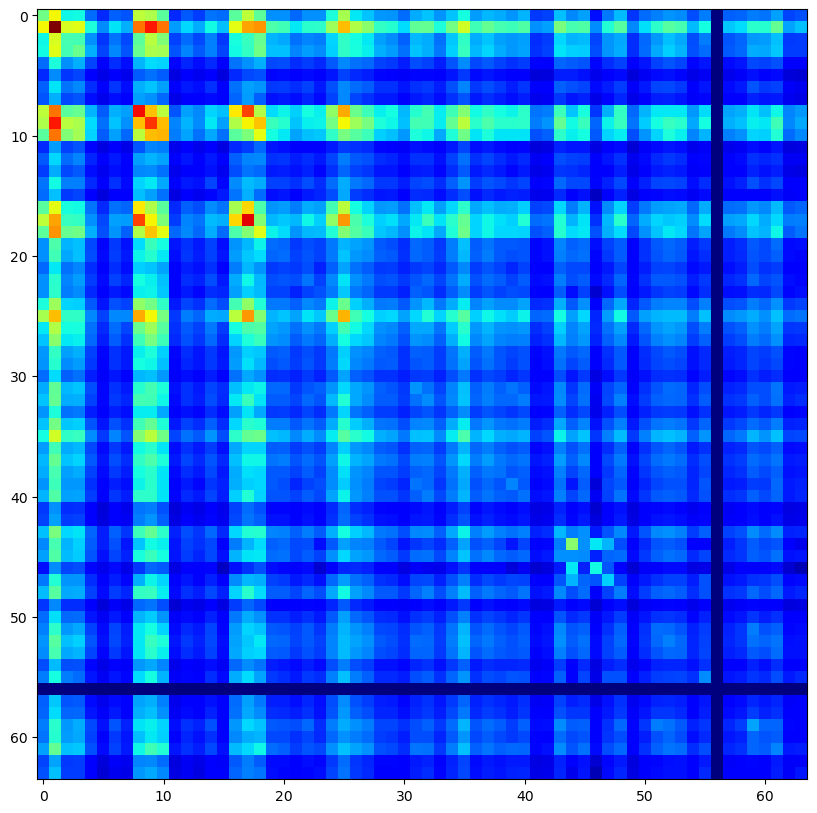

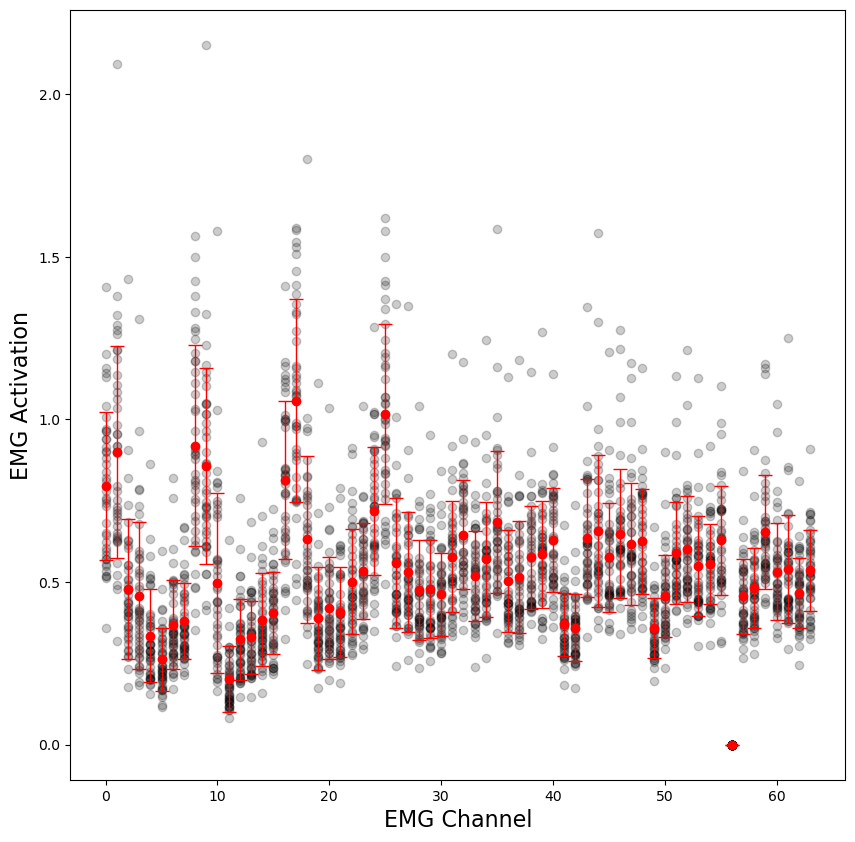

In [10]:
for subject_name, he in hit_ends.items():
    print([x.shape for x in he])
    plt.figure(figsize=(10,10))
    plt.imshow(np.cov(he[0].T),cmap="jet")
    plt.figure(figsize=(10,10))
    for hex in he[0]:
        plt.plot(hex,'ko',alpha=0.2)
    plt.errorbar(range(64),np.nanmean(he[0],axis=0),yerr=np.nanstd(he[0],axis=0), marker="o", capsize=5, elinewidth=1, linewidth=0, color="r")
    plt.xlabel("EMG Channel")
    plt.ylabel("EMG Activation")
    break

(41, 64)


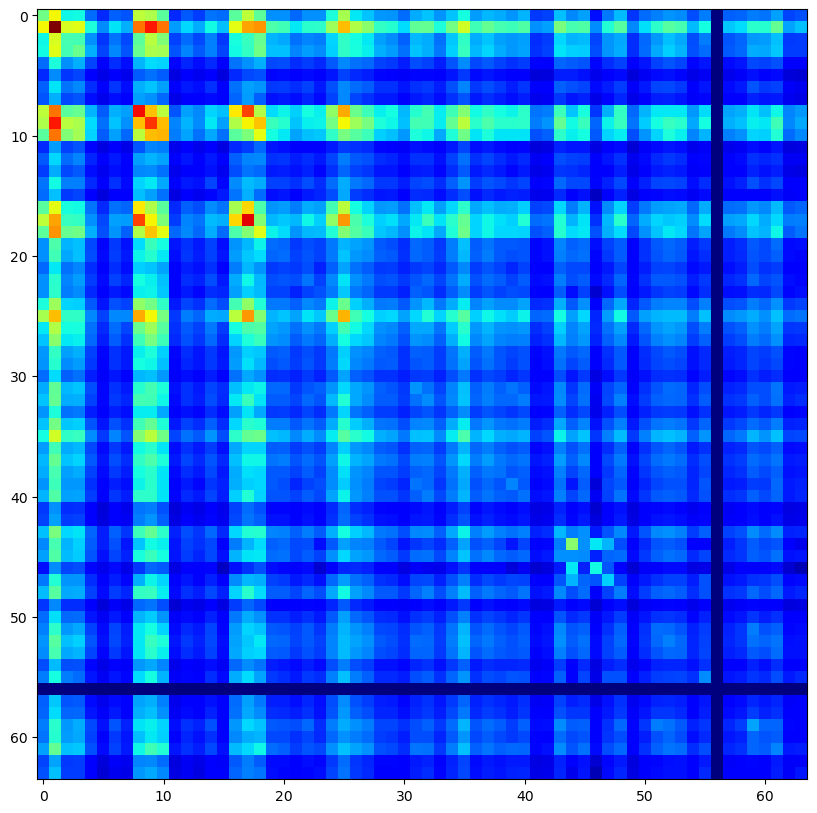

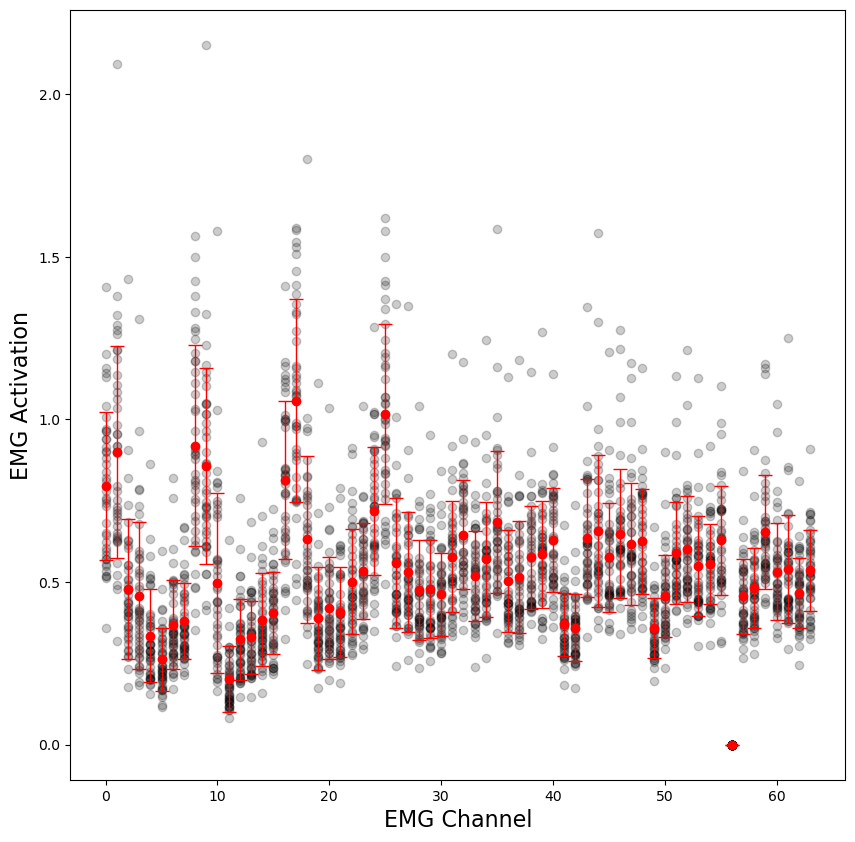

In [69]:
for subject_name, he in hit_ends.items():
    print(he[0].shape)
    plt.figure(figsize=(10,10))
    plt.imshow(np.cov(he[0].T),cmap="jet")
    plt.figure(figsize=(10,10))
    for hex in he[0]:
        plt.plot(hex,'ko',alpha=0.2)
    plt.errorbar(range(64),np.nanmean(he[0],axis=0),yerr=np.nanstd(he[0],axis=0), marker="o", capsize=5, elinewidth=1, linewidth=0, color="r")
    plt.xlabel("EMG Channel")
    plt.ylabel("EMG Activation")
    break

## hit end variance ratio + mean "active" emg variance ratio VS targets FOR ALL subjects

(46, 45, 12)


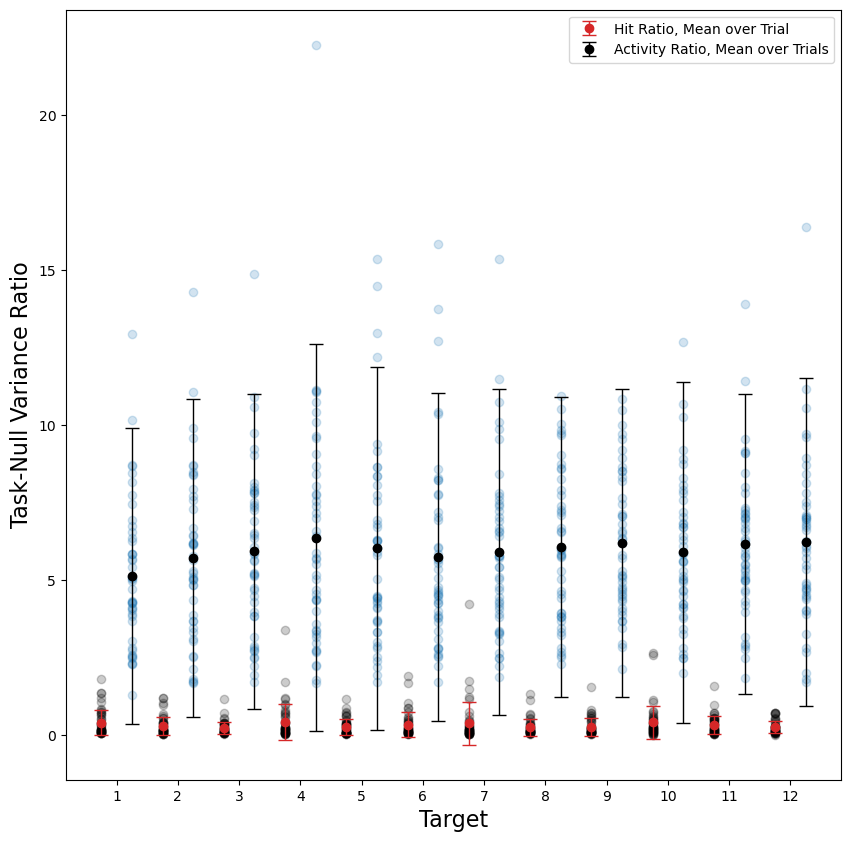

In [11]:
plt.figure(figsize=(10,10))
hit_end_ratio_stack = np.zeros(shape=(12,))
# plotting subjects for each target
for subject in c.alphabetically_sorted_subjects():
    hit_end_ratio_stack = np.vstack([hit_end_ratio_stack, hit_end_ratios[subject.name]])
    plt.plot(hit_end_ratios[subject.name],"ko",alpha=0.2)
hit_end_ratio_stack = hit_end_ratio_stack[1:,:]
# mean over subjects for each target
plt.errorbar(range(12),np.nanmean(hit_end_ratio_stack,axis=0),yerr=np.nanstd(hit_end_ratio_stack,axis=0), marker="o", capsize=5, elinewidth=1, linewidth=0, color="tab:red",label="Hit Ratio, Mean over Trial")

# subject, target, trial
print(emg_ratios.shape)

# means over trials -- plotting subjects
x = [x+0.5 for x in range(12)]
for subject_trial_mean, subject_trial_std in zip(np.nanmean(emg_ratios, axis=1), np.nanstd(emg_ratios, axis=1)):
    plt.plot(x, subject_trial_mean, "o", color="tab:blue", alpha=0.2)

plt.errorbar(x,np.nanmean(emg_ratios,axis=(0,1)),yerr=np.nanstd(emg_ratios,axis=(0,1)), marker="o", capsize=5, elinewidth=1, linewidth=0, color="k",label="Activity Ratio, Mean over Trials")

plt.xticks([x+0.25 for x in range(12)], labels=[x+1 for x in range(12)])
plt.xlabel("Target")
plt.ylabel("Task-Null Variance Ratio")
plt.legend()

## effect of window size of the hit end on the mean over subjects per target

Text(0.5, 0, 'Target')

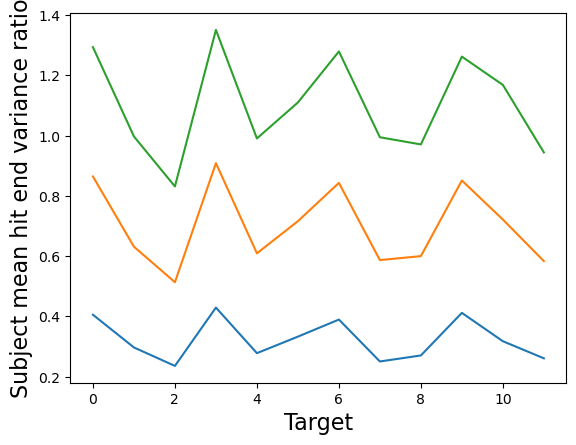

In [33]:
samples_15 = [1.29356638, 0.99714795, 0.83137877, 1.35087351, 0.9906097, 1.11008976, 1.2794176 , 0.99457665, 0.97077403, 1.26228672, 1.16839835, 0.94437787]
samples_10 = [0.86427778, 0.63130813, 0.51341782, 0.90867263, 0.60925327, 0.71606523, 0.84308134, 0.58683775, 0.59997757, 0.85101878, 0.72133085, 0.58348162]
samples_5 = [0.40543724, 0.29683056, 0.23553798, 0.42920112, 0.27790572, 0.33274453, 0.38942939, 0.25033928, 0.27024989, 0.41164893, 0.31751965, 0.26080828]

plt.plot(samples_5, label="5 Samples")
plt.plot(samples_10, label="10 Samples")
plt.plot(samples_15, label="15 Samples")
plt.ylabel("Subject mean hit end variance ratio")
plt.xlabel("Target")

(46, 45, 12)


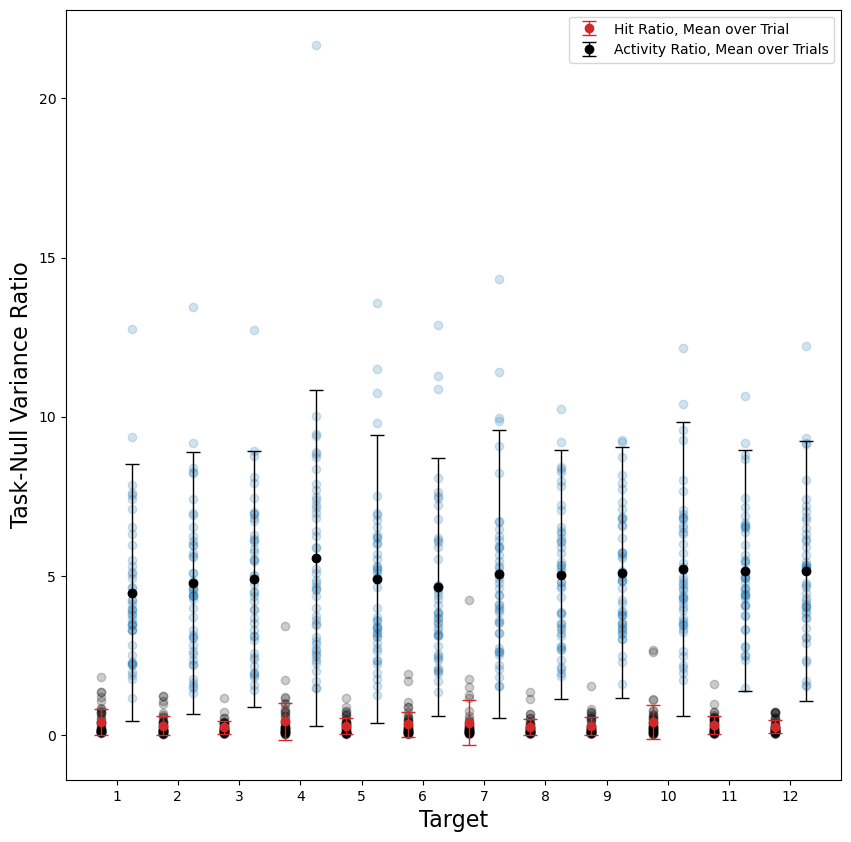

In [22]:
plt.figure(figsize=(10,10))
hit_end_ratio_stack = np.zeros(shape=(12,))
# plotting subjects for each target
for subject in c.alphabetically_sorted_subjects():
    hit_end_ratio_stack = np.vstack([hit_end_ratio_stack, hit_end_ratios[subject.name]])
    plt.plot(hit_end_ratios[subject.name],"ko",alpha=0.2)
hit_end_ratio_stack = hit_end_ratio_stack[1:,:]
# mean over subjects for each target
plt.errorbar(range(12),np.nanmean(hit_end_ratio_stack,axis=0),yerr=np.nanstd(hit_end_ratio_stack,axis=0), marker="o", capsize=5, elinewidth=1, linewidth=0, color="tab:red",label="Hit Ratio, Mean over Trial")

# subject, target, trial
print(emg_ratios.shape)

# means over trials -- plotting subjects
x = [x+0.5 for x in range(12)]
for subject_trial_mean, subject_trial_std in zip(np.nanmean(emg_ratios, axis=1), np.nanstd(emg_ratios, axis=1)):
    plt.plot(x, subject_trial_mean, "o", color="tab:blue", alpha=0.2)

plt.errorbar(x,np.nanmean(emg_ratios,axis=(0,1)),yerr=np.nanstd(emg_ratios,axis=(0,1)), marker="o", capsize=5, elinewidth=1, linewidth=0, color="k",label="Activity Ratio, Mean over Trials")

plt.xticks([x+0.25 for x in range(12)], labels=[x+1 for x in range(12)])
plt.xlabel("Target")
plt.ylabel("Task-Null Variance Ratio")
plt.legend()

## hit fractions VS mean hit end ratio FOR ALL subjects (mean over targets)

Text(0, 0.5, 'Null Variance, Mean over Targets')

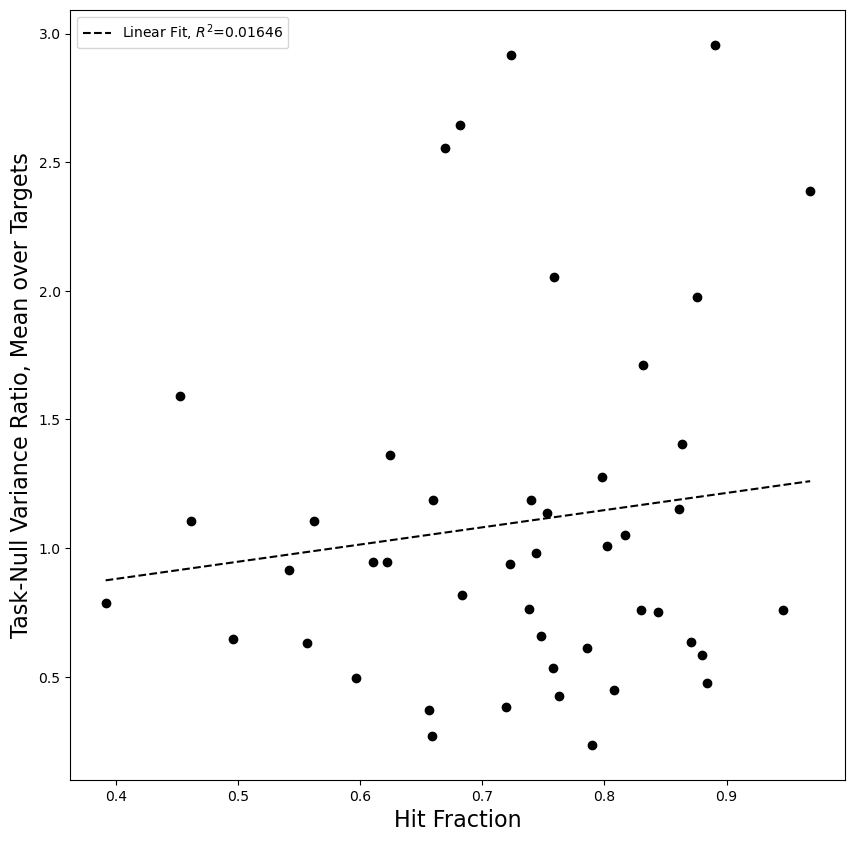

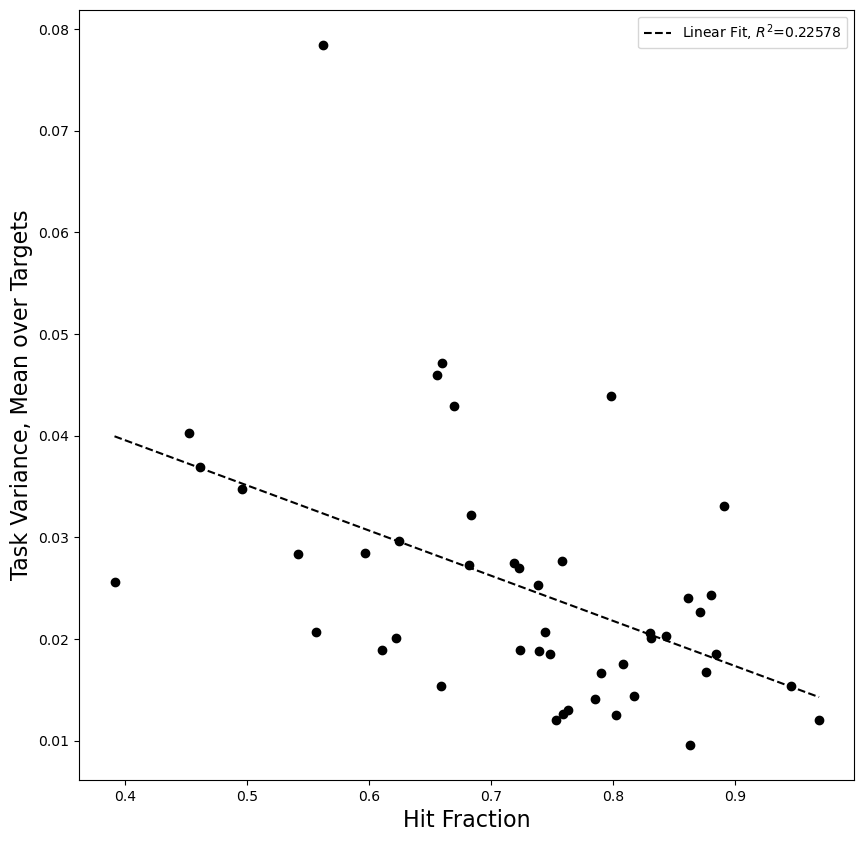

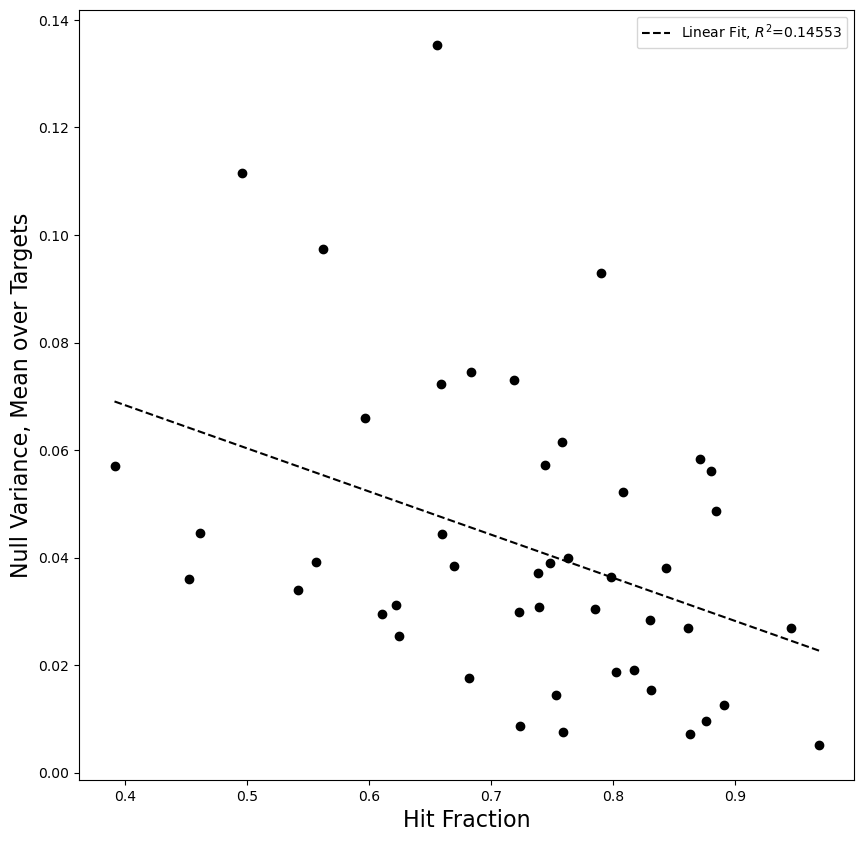

In [14]:
hfs, mean_ratios, task_vars, null_vars = [], [], [], []
for subject_name, mean_ratio in mean_hit_end_ratios.items():
    mean_ratios.append(mean_ratio)
    hfs.append(hit_fractions[subject_name])
    task_vars.append(mean_hit_end_task_vars[subject_name])
    null_vars.append(mean_hit_end_null_vars[subject_name])

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(hfs, mean_ratios, "ko")
x = np.linspace(np.min(hfs), np.max(hfs), len(hfs))
result = scipy.stats.linregress(hfs, mean_ratios)
ax.plot(x, result.intercept + result.slope*x,"k--", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")
ax.legend()
ax.set_xlabel("Hit Fraction")
ax.set_ylabel("Task-Null Variance Ratio, Mean over Targets")

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(hfs, task_vars, "ko")
x = np.linspace(np.min(hfs), np.max(hfs), len(hfs))
result = scipy.stats.linregress(hfs, task_vars)
ax.plot(x, result.intercept + result.slope*x,"k--", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")
ax.legend()
ax.set_xlabel("Hit Fraction")
ax.set_ylabel("Task Variance, Mean over Targets")

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(hfs, null_vars, "ko")
x = np.linspace(np.min(hfs), np.max(hfs), len(hfs))
result = scipy.stats.linregress(hfs, null_vars)
ax.plot(x, result.intercept + result.slope*x,"k--", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")
ax.legend()
ax.set_xlabel("Hit Fraction")
ax.set_ylabel("Null Variance, Mean over Targets")


Text(0, 0.5, 'Null Variance, Mean over Targets')

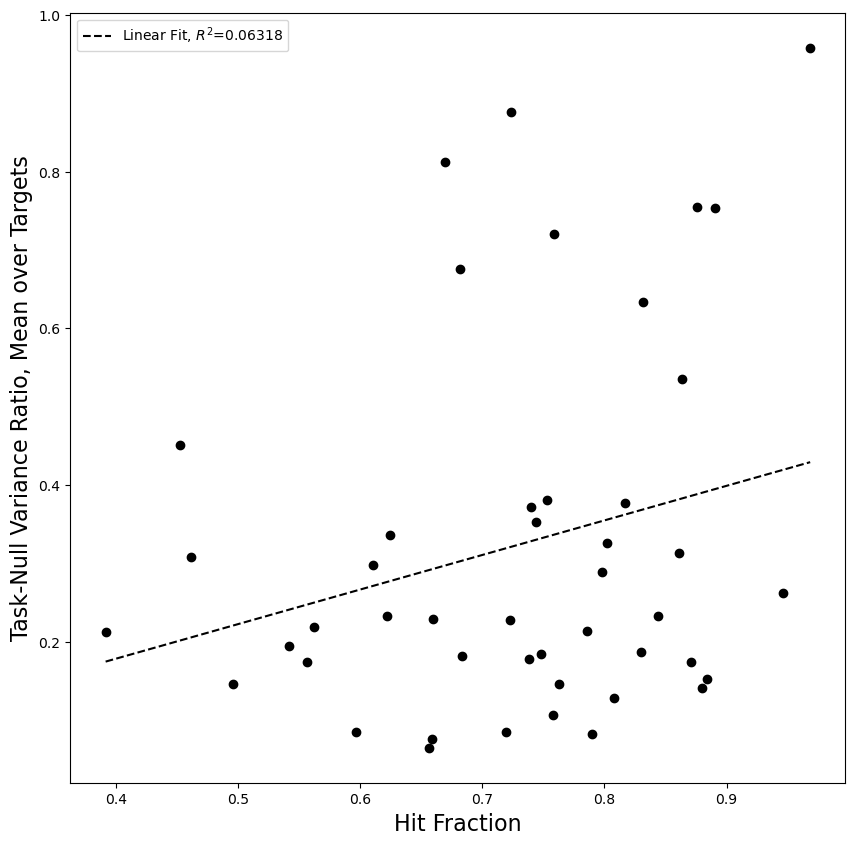

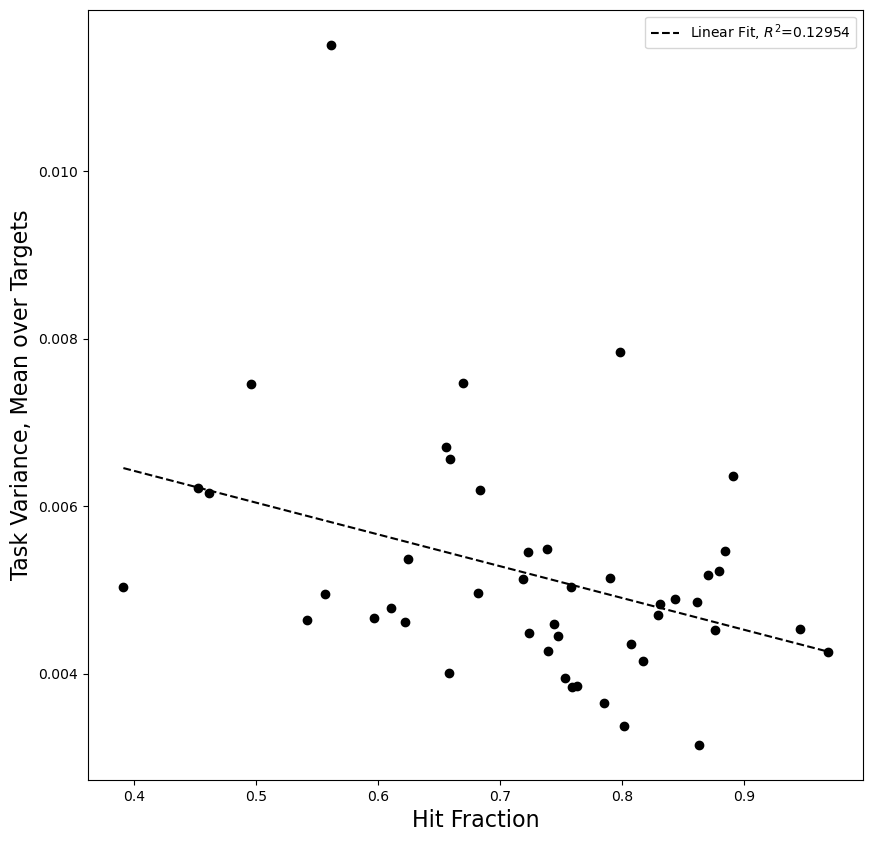

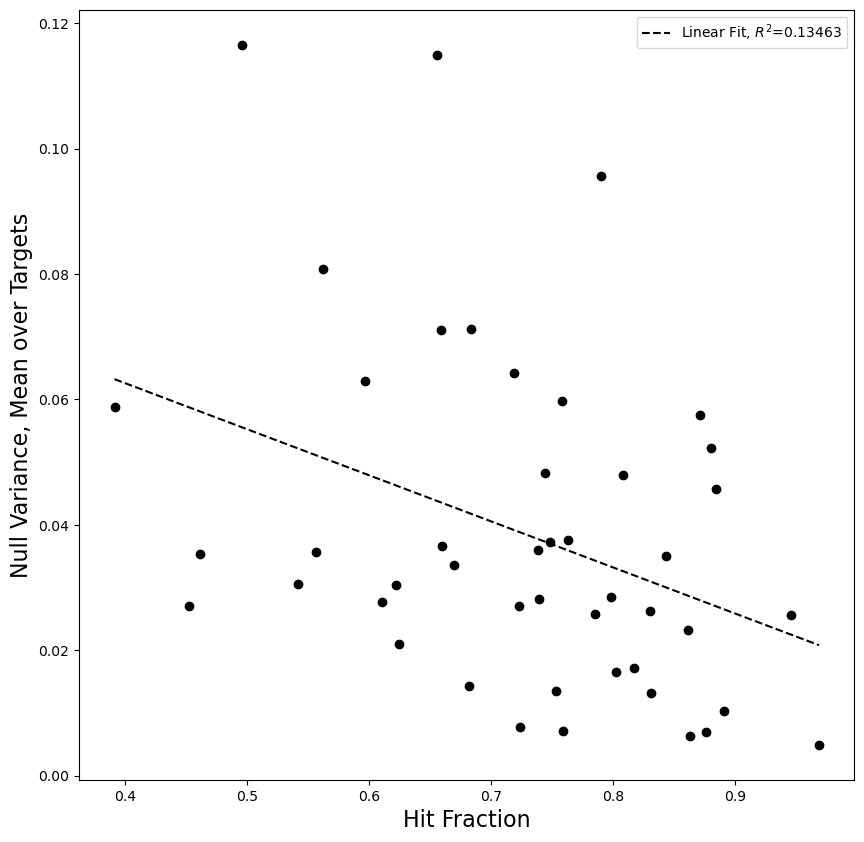

In [20]:
hfs, mean_ratios, task_vars, null_vars = [], [], [], []
for subject_name, mean_ratio in mean_hit_end_ratios.items():
    mean_ratios.append(mean_ratio)
    hfs.append(hit_fractions[subject_name])
    task_vars.append(mean_hit_end_task_vars[subject_name])
    null_vars.append(mean_hit_end_null_vars[subject_name])

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(hfs, mean_ratios, "ko")
x = np.linspace(np.min(hfs), np.max(hfs), len(hfs))
result = scipy.stats.linregress(hfs, mean_ratios)
ax.plot(x, result.intercept + result.slope*x,"k--", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")
ax.legend()
ax.set_xlabel("Hit Fraction")
ax.set_ylabel("Task-Null Variance Ratio, Mean over Targets")

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(hfs, task_vars, "ko")
x = np.linspace(np.min(hfs), np.max(hfs), len(hfs))
result = scipy.stats.linregress(hfs, task_vars)
ax.plot(x, result.intercept + result.slope*x,"k--", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")
ax.legend()
ax.set_xlabel("Hit Fraction")
ax.set_ylabel("Task Variance, Mean over Targets")

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(hfs, null_vars, "ko")
x = np.linspace(np.min(hfs), np.max(hfs), len(hfs))
result = scipy.stats.linregress(hfs, null_vars)
ax.plot(x, result.intercept + result.slope*x,"k--", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")
ax.legend()
ax.set_xlabel("Hit Fraction")
ax.set_ylabel("Null Variance, Mean over Targets")


## hits VS mean "active" emg variance ratio FOR ALL subjects (mean over targets and trials)

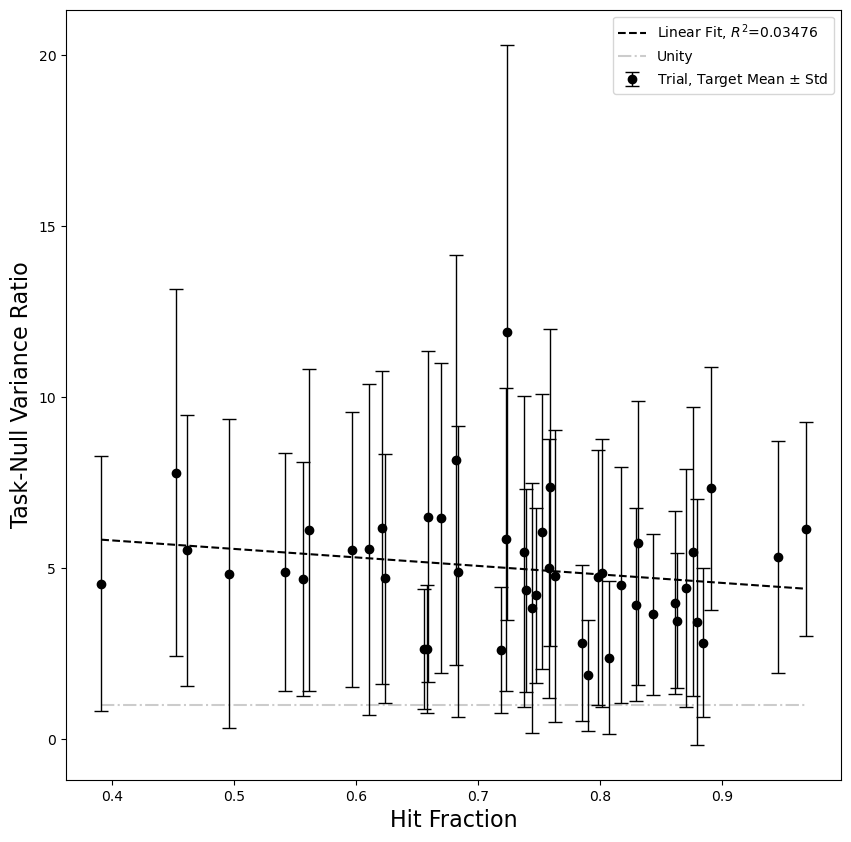

In [41]:
plt.figure(figsize=(10,10))

x = [x+0.5 for x in range(12)]

# means over trials and targets
plt.errorbar(hit_fraction_list, np.nanmean(emg_ratios,axis=(1,2)), yerr=np.nanstd(emg_ratios,axis=(1,2)), marker="o", capsize=5, elinewidth=1, linewidth=0, color="k",label="Trial, Target Mean $\pm$ Std")
x = np.linspace(np.min(hit_fraction_list), np.max(hit_fraction_list), len(hit_fraction_list))
result = scipy.stats.linregress(hit_fraction_list, np.nanmean(emg_ratios,axis=(1,2)))
plt.plot(x, result.intercept + result.slope*x,"k--", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")
plt.plot([x[0],x[-1]],[1,1],"k-.",alpha=0.2, label="Unity")
plt.ylabel("Task-Null Variance Ratio")
plt.xlabel("Hit Fraction")
plt.legend()

## mean "active" emg variance ratio VS block (mean over targets + subjects)

(46, 45, 12)


/var/folders/dz/870p8tdx43j5527kzthy65zw0000gn/T/ipykernel_75320/1773472652.py:6: RuntimeWarning: Mean of empty slice
  mean_over_blocks = np.nanmean(emg_block_ratios,axis=(2))


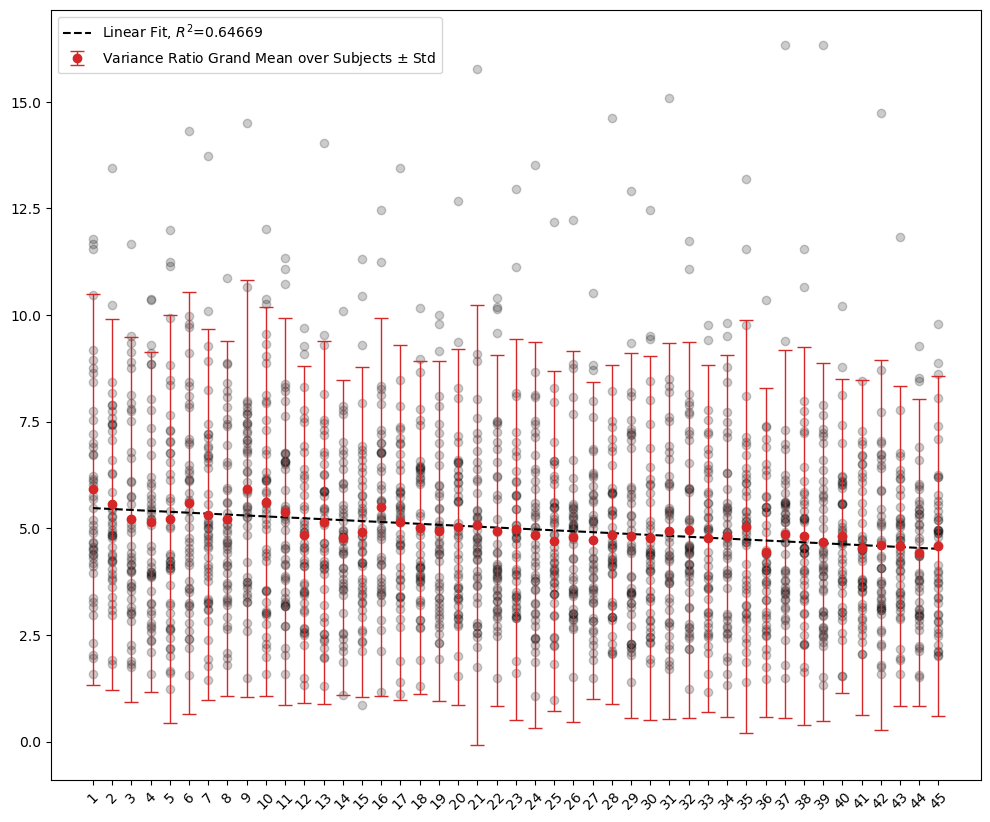

In [58]:
print(emg_block_ratios.shape)
# num_non_nan = np.count_nonzero(~np.isnan(emg_block_ratios))

plt.figure(figsize=(12,10))
# mean of each block's ratios, subjects x block
mean_over_blocks = np.nanmean(emg_block_ratios,axis=(2))
for subject_block_ratio in mean_over_blocks:
    plt.plot(subject_block_ratio, "ko", alpha=0.2)
x = range(45)
plt.errorbar(x, np.nanmean(emg_block_ratios,axis=(0,2)), yerr=np.nanstd(emg_block_ratios,axis=(0,2)), marker="o", capsize=5, elinewidth=1, linewidth=0, color="tab:red",label="Variance Ratio Grand Mean over Subjects $\pm$ Std")
result = scipy.stats.linregress(range(45), np.nanmean(emg_block_ratios,axis=(0,2)))
plt.plot(x, result.intercept + result.slope*x,"k--", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")
plt.xticks(range(45),labels=range(1,46),rotation=45)
plt.legend()

## stddev of emg variance ratio within each block VS block (mean over subjects)

(46, 45, 12)
(46, 45)


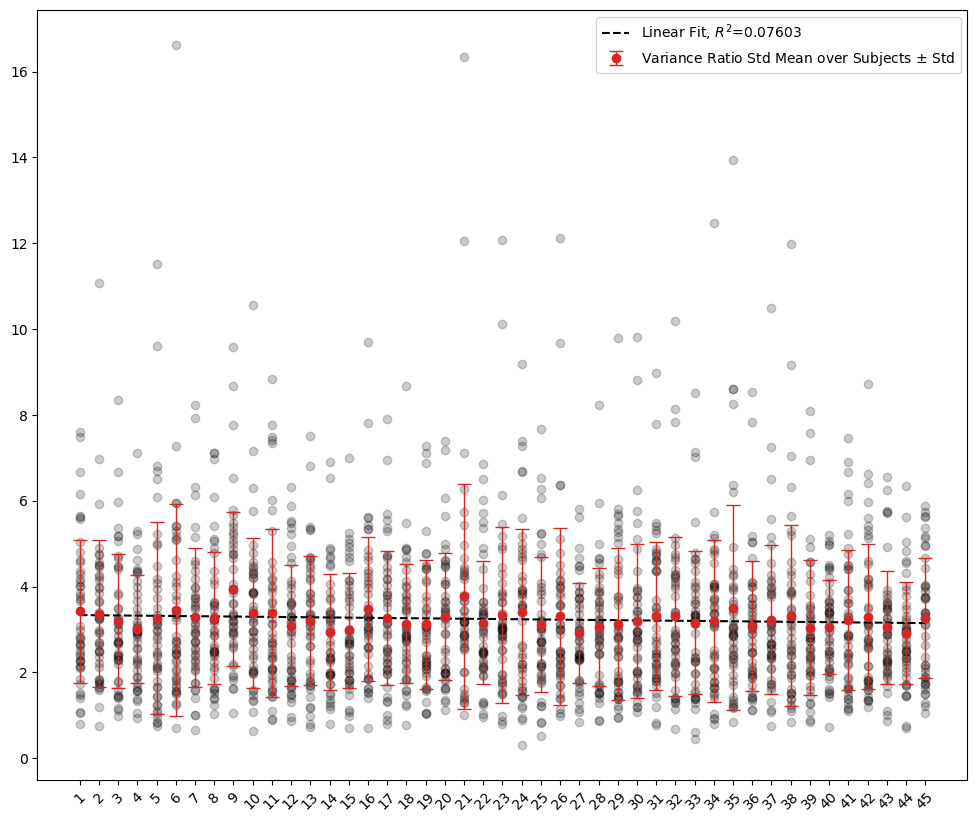

In [56]:
print(emg_block_ratios.shape)
# num_non_nan = np.count_nonzero(~np.isnan(emg_block_ratios))

plt.figure(figsize=(12,10))
std_over_blocks = np.nanstd(emg_block_ratios,axis=(2))
print(std_over_blocks.shape)
for subject_block_ratio in std_over_blocks:
    plt.plot(subject_block_ratio, "ko", alpha=0.2)
x = range(45)
# mean over subjects
plt.errorbar(x, np.nanmean(std_over_blocks,axis=(0)), yerr=np.nanstd(std_over_blocks,axis=(0)), marker="o", capsize=5, elinewidth=1, linewidth=0, color="tab:red",label="Variance Ratio Std Mean over Subjects $\pm$ Std")
result = scipy.stats.linregress(x, np.nanmean(std_over_blocks,axis=(0)))
plt.plot(x, result.intercept + result.slope*x,"k--", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")
plt.xticks(range(45),labels=range(1,46),rotation=45)
plt.legend()

## zoom in on target 5 -- over trials, each subject's ratio for that target, mean over subjects

(46, 12) (46, 45, 12)


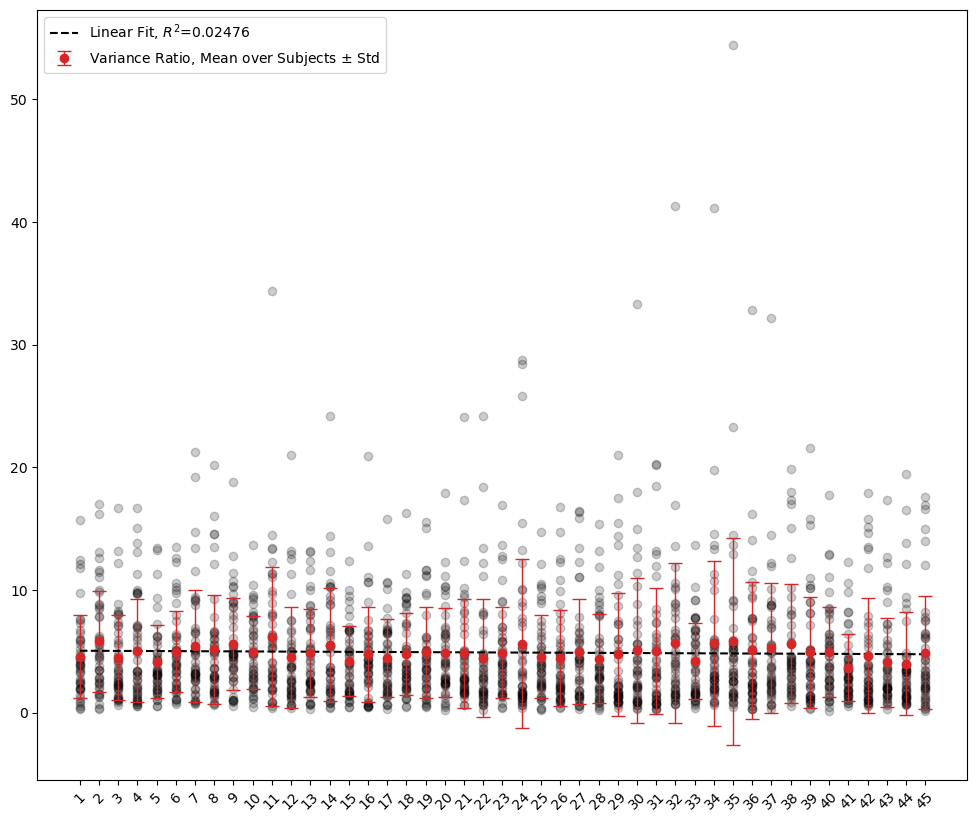

In [68]:
print(hit_end_ratio_stack.shape, emg_ratios.shape)

target_5_hit_end = hit_end_ratio_stack[:,4]
emg_ratios_target_5 = emg_ratios[:,:,4]

plt.figure(figsize=(12,10))
# plt.plot(target_5_hit_end, label="Hit End Ratio")
for trial_ratio in emg_ratios_target_5:
    plt.plot(trial_ratio, "ko",alpha=0.2)
plt.errorbar(range(45), np.nanmean(emg_ratios_target_5,axis=(0)),yerr=np.nanstd(emg_ratios_target_5,axis=(0)), marker="o", capsize=5, elinewidth=1, linewidth=0, color="tab:red",label="Variance Ratio, Mean over Subjects $\pm$ Std")
result = scipy.stats.linregress(x, np.nanmean(emg_ratios_target_5,axis=(0)))
plt.plot(x, result.intercept + result.slope*x,"k--", label=f"Linear Fit, $R^2$={np.round(result.rvalue**2, 5)}")
plt.xticks(range(45),labels=range(1,46),rotation=45)
plt.legend()

In [ ]:
def find_rise_point(sig):
    # where does the activity first go above a threshold?
    # assuming we've removed the hold steps
    # params
    num_to_avg = 10
    percentile = 0.15
    threshold = np.max(np.quantile(np.abs(sig),percentile,axis=0))

    # average the few steps of data
    offset = np.mean(sig[:num_to_avg,:],axis=0)

    # find the first point where values go above/below this average by a threshold amount
    # only use the "x" axis point
    return np.min(np.argmax(np.abs(sig - offset) > threshold, axis=0))